In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [5]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col='Quarter')

In [6]:
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [48]:
df.shape

(42, 3)

In [49]:
df.describe()

,Sales,Quarters,Year
count,42.000000,42.0,42.0
mean,2994.353308,0.0,0.0
std,977.930896,0.0,0.0
min,1547.818996,0.0,0.0
25%,2159.714247,0.0,0.0
50%,2782.376999,0.0,0.0
75%,3609.250000,0.0,0.0
max,5253.000000,0.0,0.0


# Plot

<function matplotlib.pyplot.show(close=None, block=None)>

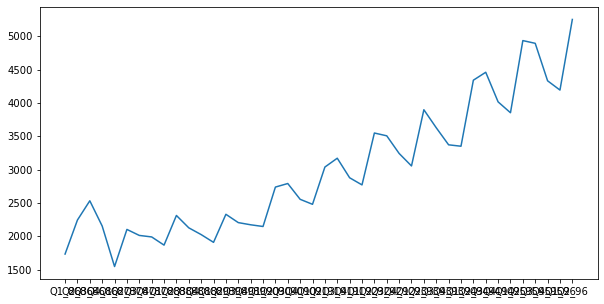

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

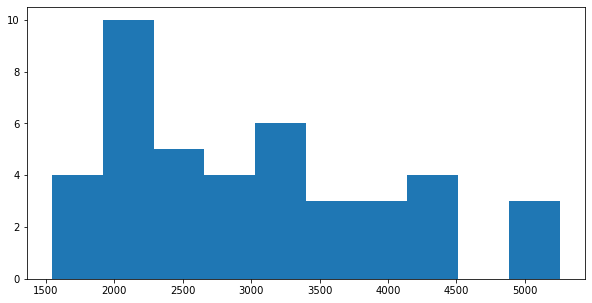

In [8]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(df)
plt.show

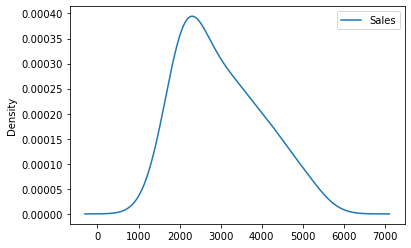

In [9]:
# Kernel Density Estimation plot
x=df.plot(kind='kde')


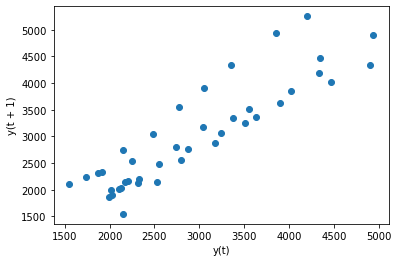

In [10]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

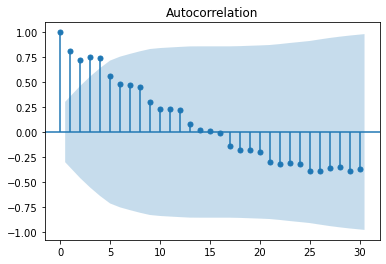

In [11]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=30)
plt.show()

In [21]:
df1=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df1['Quarters']= 0
df1['Year'] = 0
for i in range(42):
    p = df1["Quarter"][i]
    df1['Quarters'][i]= p[0:2]
    df1['Year'][i]= p[3:5]

<ipython-input-21-dfef0b7e9512>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quarters'][i]= p[0:2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-dfef0b7e9512>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'][i]= p[3:5]


In [22]:
# Prepring dummies 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df1['Quarters']))
df2 = pd.concat([df1,Quarters_Dummies],axis = 1)

In [23]:
df2["t"]=np.arange(1,43)

In [25]:
df2["t_squared"] = df2["t"]*df2["t"]
df2.columns

Index(['Quarter', 'Sales', 'Quarters', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_squared'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

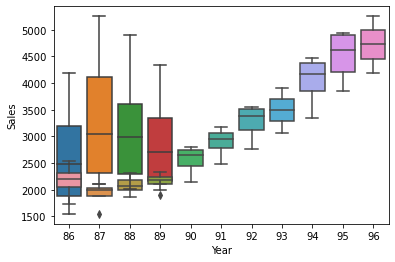

In [29]:
sns.boxplot(x="Quarters",y="Sales",data=df1)
sns.boxplot(x="Year",y="Sales",data=df1)

In [30]:
Train = df2.head(38)
Test = df2.tail(4)

# Model Building

In [31]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.5532957223963

In [32]:
# Exponential Model
df2["Log_Sales"]=np.log(df2["Sales"])
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.24797310672346

In [33]:
# Quadratic Model
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183518315095

In [36]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547276

In [37]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.7380071934617

In [39]:
# Multiplicative Seasonality
Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.389640077973

In [40]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439049818733

# Evaluation

In [42]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,591.553296
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,301.738007
4,rmse_add_sea_quad,1963.389640
5,rmse_Mult_sea,225.524390
6,rmse_Mult_add_sea,NaN



**OBSERVATION:**

Multiplicative Additive Seasonality gives the best prediction of least RMSE of 225.52439